In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, time
%matplotlib inline 
import seaborn as sns 
from ggplot import *
df=pd.read_csv('Analytics_Exercise_Data.csv', dtype={'Trip ID': str}, parse_dates=["Start Date", "End Date"]) 

In [49]:
df.dtypes
df.set_index('Start Date', inplace=True, drop=False, append=False)
df['S_Hour'] = df.index.hour
df['S_Month'] = df.index.month
df['S_Day'] = df.index.day
df['Moment of Day'] = df.S_Hour.replace({ 1:'Early-Morning', 2:'Early-Morning', 3:'Early-Morning',  4:'Early-Morning',5:'Morning', 6:'Morning',7:'Morning',8:'Morning',9: 'Morning',10:'Morning',11:'Mid-day',12:'Mid-day',13:'Mid-day',14:'Mid-day',15: 'Evening', 16:'Evening', 17: 'Evening',18:'Evening',19:'Evening',20:'Night', 22:'Night',  21:'Night', 23:'Night',0:'Night',})
df.head(3)

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,S_Hour,S_Month,S_Day,Moment of Day
Start Date,,,,,,,,,,,,,,,
2014-08-29 15:33:00,431032,27.466667,2014-08-29 15:33:00,Steuart at Market,74,2014-08-29 16:00:00,San Francisco Caltrain (Townsend at 4th),70,411,Subscriber,94107,15,8,29,Evening
2014-07-28 17:35:00,383548,10.283333,2014-07-28 17:35:00,Steuart at Market,74,2014-07-28 17:45:00,San Francisco Caltrain (Townsend at 4th),70,259,Subscriber,94403,17,7,28,Evening
2014-04-22 19:19:00,257887,9.183333,2014-04-22 19:19:00,Post at Kearny,47,2014-04-22 19:28:00,South Van Ness at Market,66,414,Subscriber,94105,19,4,22,Evening


Text(0, 0.5, 'Trips')

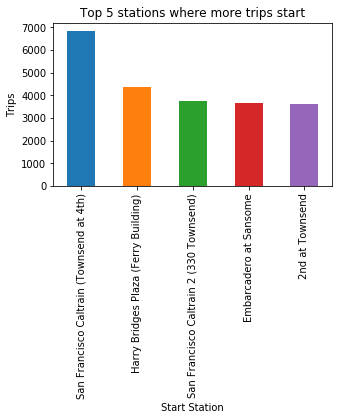

In [5]:
"""
Count start stations, and bar plot
"""
ax =df["Start Station"].value_counts()[:5].plot(kind="bar",figsize=(5, 3),title='Top 5 stations where more trips start')
ax.set_xlabel("Start Station")
ax.set_ylabel("Trips")

,Start Station,Trips
8,Broadway at Main,8
42,Redwood City Medical Center,19
21,Franklin at Maple,23
43,Redwood City Public Library,27
56,San Mateo County Center,31


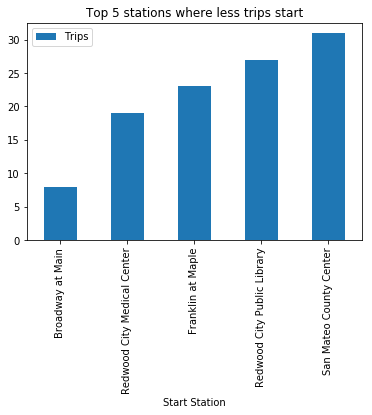

In [7]:
tripStationPorcentage = df.groupby("Start Station").size().reset_index()
tripStationPorcentage.sort_values(by=[0], inplace=True, ascending=True)
tripStationPorcentage.rename(columns={0:'Trips'}, inplace=True)
tripStationPorcentage.head(5).plot(kind='bar', x='Start Station', title="Top 5 stations where less trips start")
tripStationPorcentage.head(5)

,End Station,Trips
8,Broadway at Main,10
42,Redwood City Medical Center,22
56,San Mateo County Center,22
43,Redwood City Public Library,31
21,Franklin at Maple,34


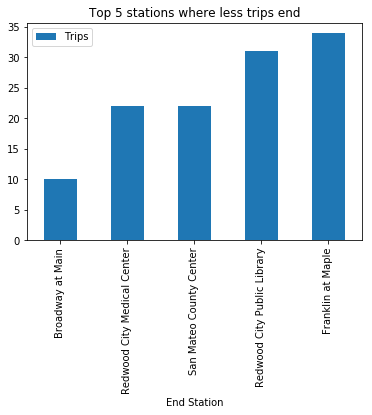

In [10]:
tripStationPorcentage = df.groupby("End Station").size().reset_index()
tripStationPorcentage.sort_values(by=[0], inplace=True, ascending=True)
tripStationPorcentage.rename(columns={0:'Trips'}, inplace=True)
tripStationPorcentage.head(5).plot(kind='bar', x='End Station', title="Top 5 stations where less trips end")
tripStationPorcentage.head(5)

Text(0,0.5,'Trips')

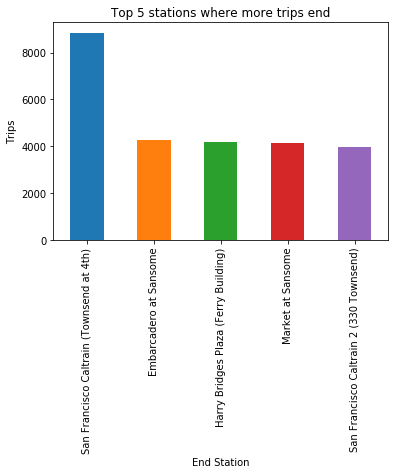

In [53]:
"""
Count end stations, and bar plot
"""
ax =df["End Station"].value_counts()[:5].plot(kind="bar",title='Top 5 stations where more trips end')
ax.set_xlabel("End Station")
ax.set_ylabel("Trips")


In [44]:
def freqTripsUser(groupParameter):
    if(groupParameter == "hourly"):
        countUserTripsBy = (df.groupby([pd.Grouper(freq='H',key='Start Date'),"Start Station","Subscriber Type"]).size()).unstack()
    elif(groupParameter == "daily"):
        countUserTripsBy = (df.groupby([pd.Grouper(freq='D',key='Start Date'),"Start Station","Subscriber Type"]).size()).unstack()
    elif(groupParameter == "weekly"):
        countUserTripsBy = (df.groupby([pd.Grouper(freq='W',key='Start Date'),"Start Station","Subscriber Type"]).size()).unstack()
    elif(groupParameter == "monthly"):  
        countUserTripsBy = (df.groupby([pd.Grouper(freq='M',key='Start Date'),"Start Station","Subscriber Type"]).size()).unstack()
    elif(groupParameter == "yearly"):
        countUserTripsBy = (df.groupby([pd.Grouper(freq='A',key='Start Date'),"Start Station","Subscriber Type"]).size()).unstack()
    countUserTripsBy.rename(columns={0:'Count'}, inplace=True)
    return countUserTripsBy

In [45]:
countUserTripsBy = freqTripsUser("hourly")
countUserTripsBy

Subscriber Type                                                    Customer  \
Start Date          Start Station                                             
2014-03-01 00:00:00 Civic Center BART (7th at Market)                   NaN   
                    Powell Street BART                                  NaN   
                    Redwood City Caltrain Station                       NaN   
                    San Francisco Caltrain (Townsend at 4th)            NaN   
2014-03-01 01:00:00 Broadway St at Battery St                           NaN   
2014-03-01 02:00:00 Washington at Kearny                                2.0   
2014-03-01 03:00:00 Harry Bridges Plaza (Ferry Building)                1.0   
2014-03-01 04:00:00 Townsend at 7th                                     NaN   
2014-03-01 06:00:00 Market at Sansome                                   NaN   
2014-03-01 07:00:00 Grant Avenue at Columbus Avenue                     NaN   
2014-03-01 08:00:00 2nd at South Park                                   NaN   
                    2nd at Townsend                                     NaN   
                    Embarcadero at Bryant                               NaN   
                    Market at 10th                                      1.0   
2014-03-01 09:00:00 2nd at South Park                                   NaN   
                    Embarcadero at Vallejo                              2.0   
                    Harry Bridges Plaza (Ferry Building)                2.0   
                    Market at 4th                                       2.0   
                    Powell at Post (Union Square)                       1.0   
                    San Jose Diridon Caltrain Station                   NaN   
                    Townsend at 7th                                     1.0   
                    Yerba Buena Center of the Arts (3rd @ Howard)       NaN   
2014-03-01 10:00:00 Embarcadero at Sansome                              1.0   
                    Golden Gate at Polk                                 NaN   
                    Grant Avenue at Columbus Avenue                     NaN   
                    Harry Bridges Plaza (Ferry Building)                NaN   
                    Market at Sansome                                   NaN   
                    San Francisco Caltrain (Townsend at 4th)            1.0   
                    South Van Ness at Market                            NaN   
                    Townsend at 7th                                     NaN   
...                                                                     ...   
2014-08-31 17:00:00 San Antonio Caltrain Station                        2.0   
                    Steuart at Market                                   1.0   
                    Washington at Kearny                                1.0   
2014-08-31 18:00:00 2nd at Townsend                                     1.0   
                    5th at Howard                                       1.0   
                    California Ave Caltrain Station                     2.0   
                    Embarcadero at Bryant                               1.0   
                    Embarcadero at Folsom                               1.0   
                    Embarcadero at Sansome                              NaN   
                    Grant Avenue at Columbus Avenue                     3.0   
                    Harry Bridges Plaza (Ferry Building)                NaN   
                    Powell at Post (Union Square)                       3.0   
                    University and Emerson                              1.0   
                    Washington at Kearny                                NaN   
                    Yerba Buena Center of the Arts (3rd @ Howard)       2.0   
2014-08-31 19:00:00 Davis at Jackson                                    2.0   
                    Embarcadero at Vallejo                              1.0   
                    Grant Avenue at Columbus Avenu

In [46]:
countUserTripsBy = freqTripsUser("daily")
countUserTripsBy

Subscriber Type                                           Customer  Subscriber
Start Date Start Station                                                      
2014-03-01 2nd at Folsom                                       NaN         5.0
           2nd at South Park                                   1.0         4.0
           2nd at Townsend                                     NaN         3.0
           5th at Howard                                       2.0         3.0
           Arena Green / SAP Center                            NaN         1.0
           Beale at Market                                     NaN         1.0
           Broadway St at Battery St                           NaN         2.0
           Civic Center BART (7th at Market)                   NaN         1.0
           Commercial at Montgomery                            NaN         2.0
           Davis at Jackson                                    5.0         2.0
           Embarcadero at Bryant                               1.0         3.0
           Embarcadero at Sansome                              8.0         3.0
           Embarcadero at Vallejo                              3.0         1.0
           Franklin at Maple                                   NaN         1.0
           Golden Gate at Polk                                 NaN         2.0
           Grant Avenue at Columbus Avenue                     1.0         7.0
           Harry Bridges Plaza (Ferry Building)               11.0         8.0
           MLK Library                                         2.0         NaN
           Market at 10th                                      1.0         3.0
           Market at 4th                                       2.0         3.0
           Market at Sansome                                   1.0         4.0
           Mechanics Plaza (Market at Battery)                 4.0         2.0
           Park at Olive                                       NaN         1.0
           Paseo de San Antonio                                1.0         NaN
           Post at Kearny                                      1.0         1.0
           Powell Street BART                                  1.0         1.0
           Powell at Post (Union Square)                       7.0         3.0
           Redwood City Caltrain Station                       NaN         1.0
           Redwood City Public Library                         1.0         NaN
           SJSU - San Salvador at 9th                          NaN         1.0
...                                                            ...         ...
2014-08-31 Grant Avenue at Columbus Avenue                     8.0         2.0
           Harry Bridges Plaza (Ferry Building)               24.0         5.0
           Market at 10th                                      2.0         1.0
           Market at 4th                                       7.0         1.0
           Market at Sansome                                   4.0         1.0
           Mechanics Plaza (Market at Battery)                 5.0         1.0
           Mountain View Caltrain Station                      NaN         1.0
           Mountain View City Hall                             1.0         NaN
           Palo Alto Caltrain Station                          1.0         NaN
           Paseo de San Antonio                                1.0         3.0
           Post at Kearny                                      5.0         2.0
           Powell Street BART                                 10.0         3.0
           Powell at Post (Union Square)                      10.0         2.0
           Redwood City Caltrain Station                       NaN         2.0
           Ryland Park                                         NaN         1.0
           SJSU 4th at San Carlos                              1.0         NaN
           San Antonio Caltrain Station                        3.0         NaN
           San Francisco Caltrain (Townsend at 4th

In [47]:
countUserTripsBy = freqTripsUser("monthly")
countUserTripsBy

Subscriber Type                                           Customer  Subscriber
Start Date Start Station                                                      
2014-03-31 2nd at Folsom                                      21.0       325.0
           2nd at South Park                                  35.0       373.0
           2nd at Townsend                                    59.0       441.0
           5th at Howard                                      26.0       186.0
           Adobe on Almaden                                    3.0        14.0
           Arena Green / SAP Center                           10.0        22.0
           Beale at Market                                    25.0       264.0
           Broadway St at Battery St                          26.0       147.0
           Broadway at Main                                    NaN         1.0
           California Ave Caltrain Station                     7.0        22.0
           Castro Street and El Camino Real                   14.0        30.0
           Civic Center BART (7th at Market)                  55.0       173.0
           Clay at Battery                                    45.0       147.0
           Commercial at Montgomery                            8.0       227.0
           Cowper at University                                4.0        29.0
           Davis at Jackson                                   27.0       167.0
           Embarcadero at Bryant                              60.0       239.0
           Embarcadero at Folsom                              36.0       241.0
           Embarcadero at Sansome                            241.0       296.0
           Embarcadero at Vallejo                             97.0       134.0
           Evelyn Park and Ride                                8.0        17.0
           Franklin at Maple                                   1.0         6.0
           Golden Gate at Polk                                20.0       134.0
           Grant Avenue at Columbus Avenue                    50.0       285.0
           Harry Bridges Plaza (Ferry Building)              241.0       433.0
           Howard at 2nd                                      15.0       249.0
           Japantown                                          11.0        15.0
           MLK Library                                        11.0        22.0
           Market at 10th                                     50.0       279.0
           Market at 4th                                      96.0       346.0
...                                                            ...         ...
2014-08-31 Powell at Post (Union Square)                     113.0       234.0
           Redwood City Caltrain Station                       6.0        18.0
           Redwood City Medical Center                         2.0         2.0
           Redwood City Public Library                         NaN         4.0
           Rengstorff Avenue / California Street               7.0        22.0
           Ryland Park                                         6.0        51.0
           SJSU - San Salvador at 9th                          NaN        20.0
           SJSU 4th at San Carlos                             15.0        16.0
           San Antonio Caltrain Station                       12.0        45.0
           San Antonio Shopping Center                         3.0        48.0
           San Francisco Caltrain (Townsend at 4th)           87.0      1135.0
           San Francisco Caltrain 2 (330 Townsend)            37.0       706.0
           San Francisco City Hall                            41.0        62.0
           San Jose City Hall                                 11.0        71.0
           San Jose Civic Center                              19.0        16.0
           San Jose Diridon Caltrain Station                   4.0       219.0
           San Mateo County Center                             NaN         3.0
           San Pedro Square                       

In [48]:
countUserTripsBy = freqTripsUser("yearly")
countUserTripsBy

Subscriber Type                                           Customer  Subscriber
Start Date Start Station                                                      
2014-12-31 2nd at Folsom                                       155        2060
           2nd at South Park                                   253        2158
           2nd at Townsend                                     502        3129
           5th at Howard                                       286        1436
           Adobe on Almaden                                     35         147
           Arena Green / SAP Center                             63         208
           Beale at Market                                     190        2062
           Broadway St at Battery St                           170        1096
           Broadway at Main                                      3           5
           California Ave Caltrain Station                      75         106
           Castro Street and El Camino Real                     75         269
           Civic Center BART (7th at Market)                   336        1339
           Clay at Battery                                     267        1032
           Commercial at Montgomery                            150        1476
           Cowper at University                                 56         175
           Davis at Jackson                                    154        1148
           Embarcadero at Bryant                               408        1600
           Embarcadero at Folsom                               231        1593
           Embarcadero at Sansome                             1600        2070
           Embarcadero at Vallejo                              572         864
           Evelyn Park and Ride                                 57         198
           Franklin at Maple                                     2          21
           Golden Gate at Polk                                 151         881
           Grant Avenue at Columbus Avenue                     367        1729
           Harry Bridges Plaza (Ferry Building)               1433        2949
           Howard at 2nd                                       149        1559
           Japantown                                            93         171
           MLK Library                                          81         123
           Market at 10th                                      394        2212
           Market at 4th                                       638        2150
...                                                            ...         ...
           Powell at Post (Union Square)                       564        1218
           Redwood City Caltrain Station                        36         111
           Redwood City Medical Center                           3          16
           Redwood City Public Library                           6          21
           Rengstorff Avenue / California Street                58         142
           Ryland Park                                          51         275
           SJSU - San Salvador at 9th                           42         236
           SJSU 4th at San Carlos                               64          98
           San Antonio Caltrain Station                         59         311
           San Antonio Shopping Center                          33         306
           San Francisco Caltrain (Townsend at 4th)            460        6398
           San Francisco Caltrain 2 (330 Townsend)             228        3500
           San Francisco City Hall                             175         459
           San Jose City Hall                                   38         378
           San Jose Civic Center                               134          98
           San Jose Diridon Caltrain Station                    57        1349
           San Mateo County Center                              11          20
           San Pedro Square                       

Text(0, 0.5, 'Number of trips - Count')

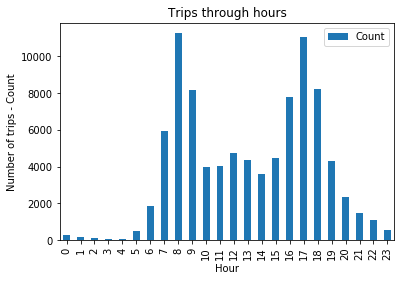

In [13]:
df.set_index('Start Date', inplace=True, drop=False, append=False)
"""
hour with highest traffic
"""
hourGraphicDf = df.groupby(df.index.hour).size().reset_index()
#hourGraphicDf.sort_values(by=[0], inplace=True)
hourGraphicDf.rename(columns={'Start Date':'Hour'}, inplace=True)
hourGraphicDf.rename(columns={0:'Count'}, inplace=True)
hourGraphicDf
ax = hourGraphicDf.plot(kind='bar', x='Hour', title="Trips through hours")
ax.set_ylabel("Number of trips - Count")

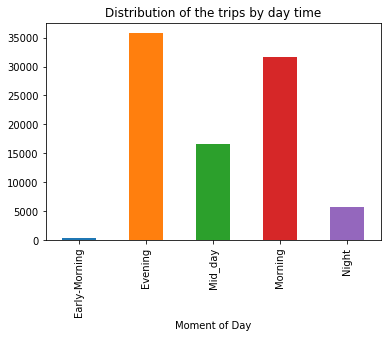

In [14]:
ax = df.groupby('Moment of Day').size().plot(kind='bar',title ="Distribution of the trips by day time")
ax.set_ylabel("")
fig = ax.get_figure()
fig.savefig("myplot1.jpg")



Text(0, 0.5, '')

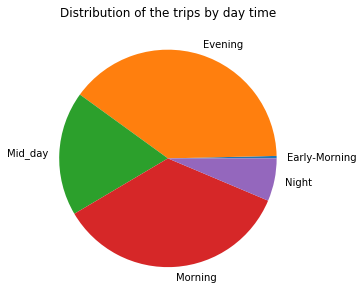

In [15]:
ax = df.groupby('Moment of Day').size().plot(kind='pie',figsize=(5, 5),title ="Distribution of the trips by day time")
ax.set_ylabel("")


D:\Users\bermu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


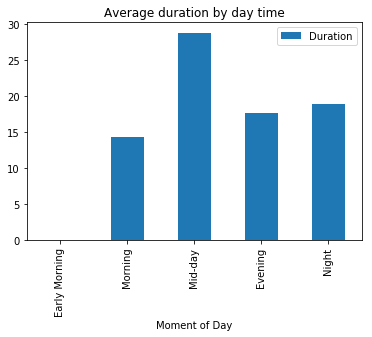

In [52]:
dfs = df
#dfs["Duration"]=dfs["Duration"]/60
DayTimeOrder=["Early Morning", "Morning", "Mid-day", "Evening", "Night"]
dfs.groupby('Moment of Day')[['Duration']].mean().loc[DayTimeOrder].plot(kind='bar', title="Average duration by day time")

In [17]:
durationDf = df.groupby(['Subscriber Type']).agg({'Duration' : np.mean}).reset_index()
durationDf
#ya esta en minutos, este mide el tiempo para crear ofertas segun necesidades

,Subscriber Type,Duration
0,Customer,63.852020
1,Subscriber,9.604265


In [18]:
#how many subs and customers there are
subsDf = df.groupby('Subscriber Type').size().reset_index()
subsDf.rename(columns={0:'Count'}, inplace=True)
subsDf


,Subscriber Type,Count
0,Customer,15118
1,Subscriber,75113


In [19]:
bikesUsageDf = df.groupby('Bike #').size().reset_index()
bikesUsageDf.sort_values(by=[0], inplace=True, ascending=False)
bikesUsageDf.rename(columns={0:'Count'}, inplace=True)
bikesUsageDf.head(5)

,Bike #,Count
522,558,314
542,579,293
558,596,286
383,415,279
538,575,277


Text(0, 0.5, 'Trips')

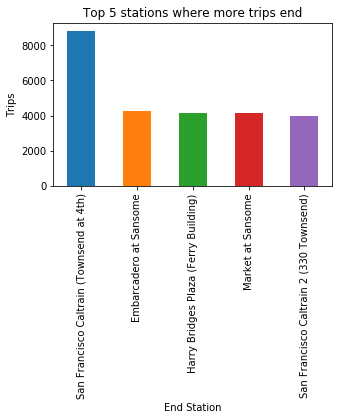

In [20]:
ax =df["End Station"].value_counts()[:5].plot(kind="bar",figsize=(5, 3), title='Top 5 stations where more trips end')
ax.set_xlabel("End Station")
ax.set_ylabel("Trips")


Text(0, 0.5, 'Hour of day')

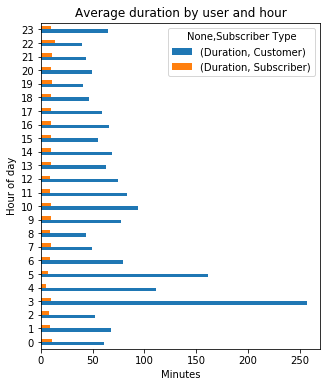

In [21]:
ax = df.groupby(['S_Hour','Subscriber Type']).aggregate(np.mean)[['Duration']].unstack().plot(kind='barh',figsize=(5, 6), title="Average duration by user and hour")
ax.set_xlabel("Minutes")
ax.set_ylabel("Hour of day")

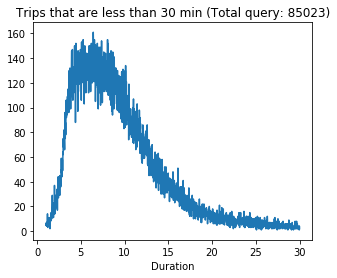

In [161]:

df.query('Duration <= 30').groupby('Duration').size().plot(figsize=(5,4),title="Trips that are less than 30 min (Total query: " + str(df.query('Duration <= 30').shape[0]) + ")")


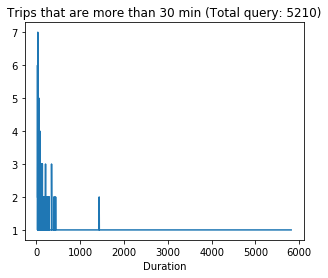

In [162]:
df.query('Duration >= 30').groupby('Duration').size().plot(figsize=(5,4),title="Trips that are more than 30 min (Total query: " + str(df.query('Duration >= 30').shape[0]) + ")")

Text(0,0.5,'')

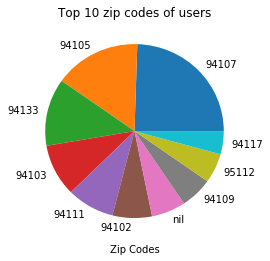

In [168]:
ax =df["Zip Code"].value_counts()[:10].plot(figsize=(4,4),kind="pie",title='Top 10 zip codes of users')
ax.set_xlabel("Zip Codes")
ax.set_ylabel("")


Text(0, 0.5, '')

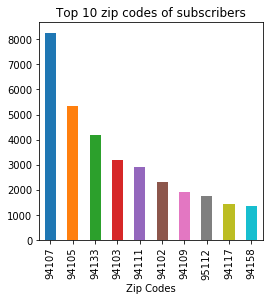

In [28]:
dff = df.loc[df['Subscriber Type'] == "Subscriber"]
ax = dff["Zip Code"].value_counts()[:10].plot(figsize=(4,4),kind="bar",title='Top 10 zip codes of subscribers')
ax.set_xlabel("Zip Codes")
ax.set_ylabel("")


Text(0, 0.5, '')

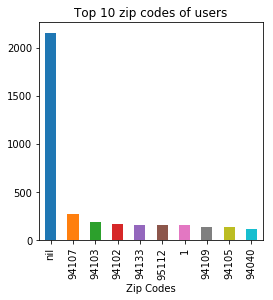

In [27]:
dff = df.loc[df['Subscriber Type'] == "Customer"]
ax = dff["Zip Code"].value_counts()[:10].plot(figsize=(4,4),kind="bar",title='Top 10 zip codes of users')
ax.set_xlabel("Zip Codes")
ax.set_ylabel("")


In [29]:
len(df[df['Start Station']== df['End Station']])

3596

In [30]:
df.shape[0]

90231